# BackPropagation

### Loading Data

In [56]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

from sklearn.datasets import make_moons

np.random.seed(0)
X, y = make_moons(200, noise=0.20)

In [57]:
np.random.seed(0)
X, y = make_moons(200, noise=0.20)

### Hypothesis Function

$$
\begin{aligned}
z_1 & = xW_1 + b_1 \\
a_1 & = sigmoid(z_1) \\
z_2 & = a_1W_2 + b_2 \\
a_2 & = \hat{y} = \mathrm{softmax}(z_2)
\end{aligned}
$$

$softmax(ll_2(\sigma(ll_1(X))))$

In [3]:
import numpy as np
W_1 = np.random.randn(2,3)
b_1 = np.random.randn(3)
W_2 = np.random.randn(3, 2)
b_2 = np.random.randn(2)

In [4]:
num_examples = len(X) # training set size
nn_features = X.shape[1] # input layer dimensionality
nn_input_dim = 2
nn_output_dim = 2 # output layer dimensionality
n_neurons = 3

In [6]:
def feed_forward(X):
    ll1 = (X@W_1 + b_1)
    L1 = sigmoid(ll1)
    ll2 = (L1@W_2 + b_2)
    y_hats = softmax(ll2)
    return y_hats

### Calculate Loss

In [7]:
def scalar_to_index(val, num_options = 2):
    y_ar = [0]*num_options
    y_ar[val] = 1
    return y_ar

In [8]:
def calculate_new_loss(y, Y_hat):
    Y = np.stack([scalar_to_index(y_val) for y_val in y])
    total_error = ((Y - Y_hat)**2).sum()
    return total_error

### Moving to Gradients

$$
\begin{aligned}
L_1 & = xW_1 + b_1 \\
a_1 & = sigmoid(z_1) \\
L_2 & = a_1W_2 + b_2 \\
RSS & = (\hat{y} - L_2)^2 
\end{aligned}
$$

$RSS(L_2(\sigma(L_1(X))))$

### Now we implement

1. RSS 

$\frac{dL}{d\hat{y}} = 2(\hat{y} - y)$

2. Linear layer

$Y = xW_1 + b_1$

$\frac{\delta L}{\delta X} = \frac{\delta L}{\delta Y}W^T $

$\frac{\delta L}{\delta W} = X^T\frac{\delta L}{\delta Y} $

$\frac{\delta L}{\delta b} = \frac{\delta L}{\delta Y} $


3. Sigmoid

* $g(x) = \sigma(x)$

* $\frac{\delta L}{\delta x}= \sigma(x)*(1 - \sigma(x)) *\frac{dL}{dA}$

In [164]:
def backwards(L1, a1, W2, Y, Y_hat, X):
# grad loss
    # 2(y_ - y)
    dloss = (Y_hat - Y)
# grad L2 = A1W2 + b2

    #dL/dX2 =  dl/dY * W.T
    dX2 = dloss.dot(W2.T) 
    #dL/dW2 =  X.T * dl/dY 
    dW2 = (a1.T).dot(dloss)
    # dL/db2 = [1]  * dl/dY
    db2 = np.sum(dloss, axis=0, keepdims=True)

# grad sigma            
    # dL/dsigma = sig(L1)(1 - sig(L1))*dX2 
    d_sigma = sigma(L1)*(1 - sigma(L1))*dX2
    
    
    
# grad L1 = a1W2 + b2  
    # dL/dW1 = dL1/dW1 * dsig/dL1
    dW1 = np.dot(X.T, d_sigma)
    
    # dL/db1 = dL1/db1 * dsig/dL1
    db1 = np.sum(d_sigma, axis=0)
    
    return (dW1, db1, dW2, db2)

In [165]:
def sigma(x): return 1/(1 + np.exp(-x))

In [166]:
epsilon = .001
Y = np.stack([scalar_to_index(y_val) for y_val in y])

In [167]:
def train_model(nn_hdim, num_passes=20000, print_loss=False):
    model = init_model(3)
    W1, b1, W2, b2 = tuple(model.values())
    for i in range(0, num_passes):          
        (z1, a1, probs) = forward(X, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backwards(z1, a1, W2, Y, probs, X)
        model = step(W1, b1, W2, b2, dW2, db2, dW1, db1)
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_new_loss(y, probs)))
    return model

In [168]:
def init_model(nn_hdim):
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    model = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [169]:
def forward(X, W1, b1, W2, b2):
    z1 = X.dot(W1) + b1 
    a1 = sigma(z1)
    z2 = a1.dot(W2) + b2
    # exp_scores = np.exp(z2)
    # probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return (z1, a1, z2)

In [170]:
def step(W1, b1, W2, b2, dW2, db2, dW1, db1):
    W1 += -epsilon * dW1
    b1 += -epsilon * db1
    W2 += -epsilon * dW2
    b2 += -epsilon * db2
    model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return model

In [171]:
model = train_model(3, num_passes=30000, print_loss=True)

Loss after iteration 0: 92.545568
Loss after iteration 1000: 38.810426
Loss after iteration 2000: 38.073801
Loss after iteration 3000: 36.755223
Loss after iteration 4000: 32.890472
Loss after iteration 5000: 25.360707
Loss after iteration 6000: 22.194691
Loss after iteration 7000: 21.717532
Loss after iteration 8000: 21.624184
Loss after iteration 9000: 21.590181
Loss after iteration 10000: 21.568854
Loss after iteration 11000: 21.550690
Loss after iteration 12000: 21.533082
Loss after iteration 13000: 21.514830
Loss after iteration 14000: 21.494841
Loss after iteration 15000: 21.471678
Loss after iteration 16000: 21.443258
Loss after iteration 17000: 21.406456
Loss after iteration 18000: 21.356435
Loss after iteration 19000: 21.285532
Loss after iteration 20000: 21.182053
Loss after iteration 21000: 21.030492
Loss after iteration 22000: 20.814871
Loss after iteration 23000: 20.524898
Loss after iteration 24000: 20.162366
Loss after iteration 25000: 19.745083
Loss after iteration 2600

Text(0.5, 1.0, 'Decision Boundary for hidden layer size 3')

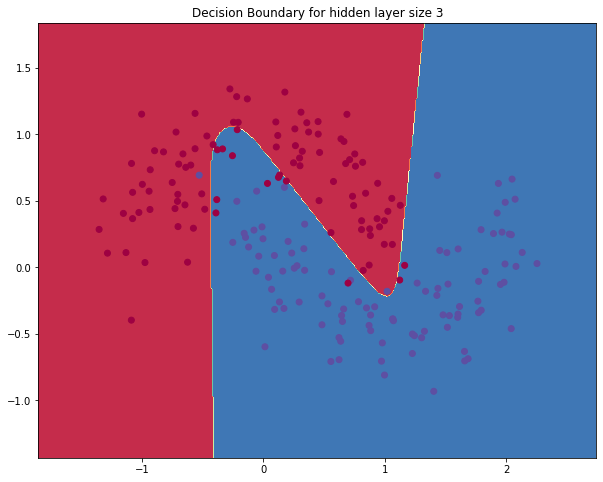

In [109]:
# from plotter import plot_decision_boundary
def plot_decision_boundary(pred_func, X):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x), X)
plt.title("Decision Boundary for hidden layer size 3")

[derivative of softmax](https://math.stackexchange.com/questions/945871/derivative-of-softmax-loss-function)

[softmax](https://eli.thegreenplace.net/2016/the-softmax-function-and-its-derivative/)

[cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a)

        
[grad of bias](https://datascience.stackexchange.com/questions/20139/gradients-for-bias-terms-in-backpropagation)